In [ ]:
# Taller

# 1
Del conjunto de datos de Temperatura, realice la selección de una provincia y realice la estimación de la densidad. Para esta estimación considere:

### a. Tabla de frecuencias

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [74]:
df = pd.read_excel("data\\Temperaturas.xlsx", sheet_name = 'Hoja3')

In [75]:
df.head(2)

,ano1,mes2,dia3,fecha4,alava5,albacete6,alicante7,almeria8,avila9,badajoz10,...,sevilla47,soria48,tarragona49,teruel50,toledo51,valladolid52,valencia53,vizcaya54,zamora55,zaragoza56
0,1990,1,1,1990-01-01,25,22,14,15,29,19,...,18,29,20,23,25,27,18,20,25,26
1,1990,1,2,1990-01-02,26,25,14,14,33,21,...,20,30,16,23,27,29,17,18,31,22


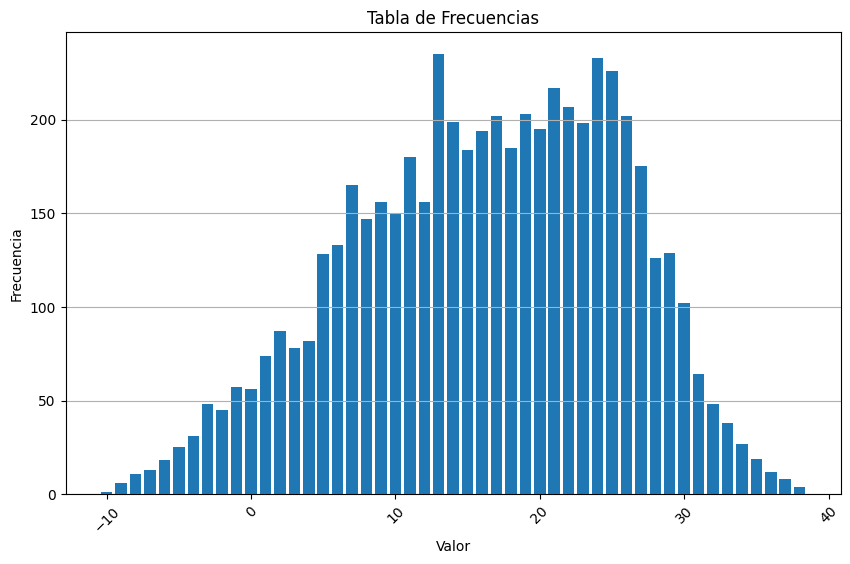

In [76]:
tabla_frecuencias = df['alava5'].value_counts()

# Convertir la serie de frecuencias en un DataFrame para facilitar el trazado
tabla_frecuencias_df = tabla_frecuencias.reset_index()
tabla_frecuencias_df.columns = ['Valor', 'Frecuencia']

# Trazar el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(tabla_frecuencias_df['Valor'], tabla_frecuencias_df['Frecuencia'])
plt.xlabel('Valor') 
plt.ylabel('Frecuencia')  
plt.title('Tabla de Frecuencias')  
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')  # Mostrar rejilla solo en el eje y
plt.show()

In [7]:
tabla_frecuencias_df = tabla_frecuencias.reset_index()
tabla_frecuencias_df.columns = ['Valor', 'Frecuencia']

In [8]:
tabla_frecuencias_df

,Valor,Frecuencia
0,13,235
1,24,233
2,25,226
3,21,217
4,22,207
5,19,203
6,17,202
7,26,202
8,14,199
9,23,198


### b Estimación utilizando al menos 2 Kernels. Al variar el ancho de banda, ¿qué puede concluir de su efecto al estimar la densidad?

In [62]:
from sklearn.neighbors import KernelDensity

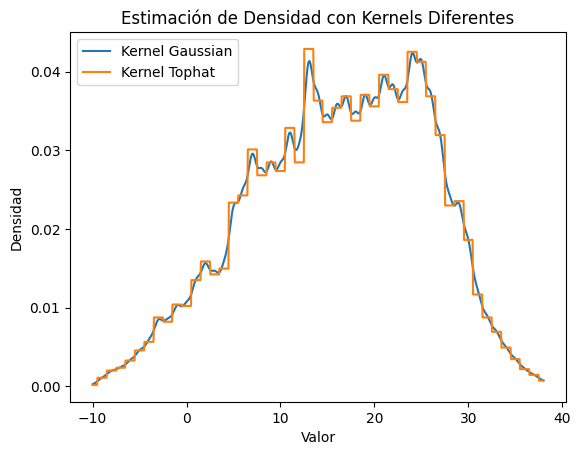

In [63]:
data = df['alava5'].values

x = np.linspace(data.min(), data.max(), 1000)

kernels = ['gaussian', 'tophat'] ##--, 'epanechnikov'
for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(data[:, None])
    log_dens = kde.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Kernel {kernel.capitalize()}')

plt.title('Estimación de Densidad con Kernels Diferentes')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

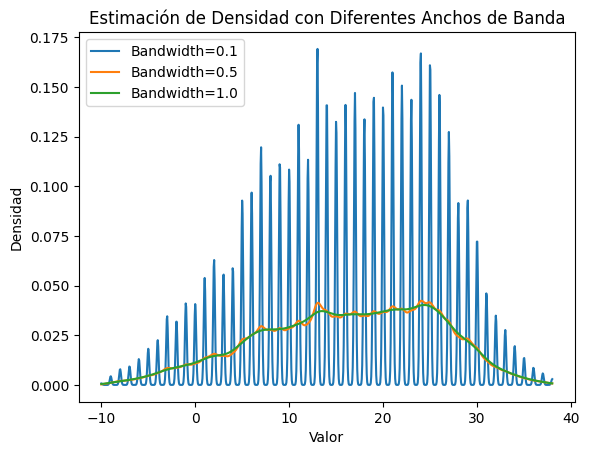

In [64]:
bandwidths = [0.1, 0.5, 1.0]

# Estimar la densidad utilizando Kernel Density Estimation (KDE) con diferentes valores de bandwidth
for bandwidth in bandwidths:
    kdeG = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data[:, None])
    log_dens = kdeG.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Bandwidth={bandwidth}')

plt.title('Estimación de Densidad con Diferentes Anchos de Banda')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

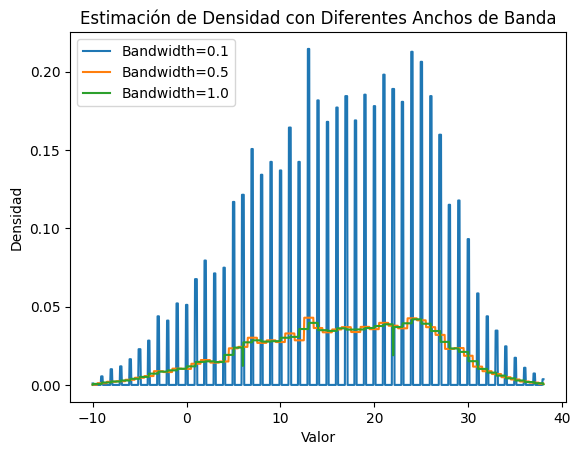

In [65]:
bandwidths = [0.1, 0.5, 1.0]

# Estimar la densidad utilizando Kernel Density Estimation (KDE) con diferentes valores de bandwidth
for bandwidth in bandwidths:
    kdeT = KernelDensity(kernel='tophat', bandwidth=bandwidth).fit(data[:, None])
    log_dens = kdeT.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Bandwidth={bandwidth}')

plt.title('Estimación de Densidad con Diferentes Anchos de Banda')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Respuesta: 
Un ancho de banda más pequeño producirá una estimación de densidad más ajustada y sensible a los detalles finos de los datos, mientras que un ancho de banda más grande resultará en una estimación de densidad más suave y generalizada. 

El kernel "tophat" tiene una particularidad, ya que la densidad estimada seguirá siendo cero fuera del ancho definido por el kernel "tophat"

# C

In [142]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm


In [143]:
data = df['alava5'].values

In [144]:
data

array([25, 26, 27, ..., 29, 26, 25], dtype=int64)

In [145]:
# Calculo la media, mediana y moda de las temperaturas
media = df['alava5'].mean()
mediana = df['alava5'].median()
moda = stats.mode(df['alava5'])[0]

print("Media de todas las columnas:", media)
print("Moda de todas las columnas:", moda)
print("Mediana de todas las columnas:", mediana)

Media de todas las columnas: 16.265741923708706
Moda de todas las columnas: 13
Mediana de todas las columnas: 17.0


In [146]:
tabla_frecuencias_df##.columns## = ['Valor', 'Frecuencia']

,Valor,Frecuencia
0,13,235
1,24,233
2,25,226
3,21,217
4,22,207
5,19,203
6,17,202
7,26,202
8,14,199
9,23,198


In [147]:
valores = tabla_frecuencias_df.index
frecuencias = tabla_frecuencias_df.values

In [148]:
x = np.linspace(data.min(), data.max(), 1000)
kernels = ['gaussian', 'tophat']

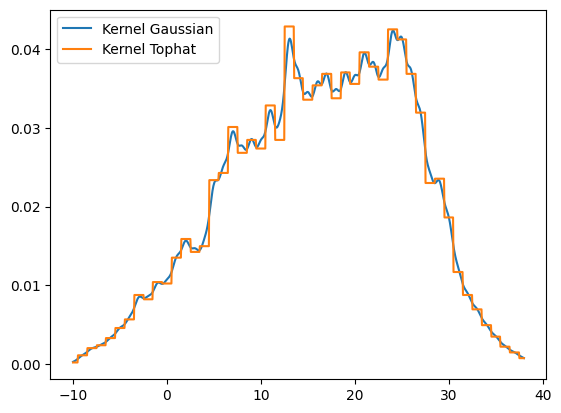

In [149]:
for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(data[:, None])
    log_dens = kde.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Kernel {kernel.capitalize()}')
    plt.legend()

In [150]:
prob_media = np.exp(kde.score_samples(np.array([[media]])))[0]
prob_mediana = np.exp(kde.score_samples(np.array([[mediana]])))[0]
prob_moda = np.exp(kde.score_samples(np.array([[moda]])))[0]

In [153]:
print("Probabilidad de obtener un valor menor o igual a la media:", prob_media)
print("Probabilidad de obtener un valor menor o igual a la mediana:", prob_mediana)
print("Probabilidad de obtener un valor menor o igual a la moda:", prob_moda)


Probabilidad de obtener un valor menor o igual a la media: 0.0354079211534952
Probabilidad de obtener un valor menor o igual a la mediana: 0.03686804161343289
Probabilidad de obtener un valor menor o igual a la moda: 0.04289103851067717


In [152]:
# Calcular la probabilidad esperada bajo una distribución normal
std_dev = df['alava5'].std()
prob_media_esperada = norm.cdf(media, loc=media, scale=std_dev)
prob_mediana_esperada = norm.cdf(mediana, loc=media, scale=std_dev)
prob_moda_esperada = norm.cdf(moda, loc=media, scale=std_dev)

# Comparo las probabilidades calculadas con las esperadas
sesgo_media = prob_media - prob_media_esperada
sesgo_mediana = prob_mediana - prob_mediana_esperada
sesgo_moda = prob_moda - prob_moda_esperada

print("Sesgo en la media:", sesgo_media)
print("Sesgo en la mediana:", sesgo_mediana)
print("Sesgo en la moda:", sesgo_moda)


Sesgo en la media: -0.4645920788465048
Sesgo en la mediana: -0.4946552026024981
Sesgo en la moda: -0.31959980303202074


Respuesta Sesgos: 

Para determinar si hay algún sesgo en los datos, podríamos comparar las probabilidades calculadas de obtener un valor menor o igual a la media, mediana y moda con una distribución teórica o esperada.

Si las probabilidades son significativamente diferentes de lo esperado bajo una distribución normal (o cualquier otra distribución que consideres adecuada para tus datos), podríamos inferir la presencia de sesgo en los datos.

Por ejemplo, si la probabilidad de obtener un valor menor o igual a la media es considerablemente baja o alta en comparación con lo esperado bajo una distribución normal, podríamos interpretar esto como evidencia de un sesgo en los datos hacia valores más altos o más bajos, respectivamente.

Por otro lado, si las probabilidades son consistentes con lo esperado bajo una distribución normal, podríamos concluir que no hay evidencia clara de sesgo en los datos.

Es importante tener en cuenta que la presencia de sesgo en los datos no se puede determinar únicamente a partir de las probabilidades calculadas. Se deben considerar otros factores y realizar un análisis más exhaustivo para llegar a una conclusión sólida sobre la presencia de sesgo en los datos.


# 2

Utilizando la densidad estimada en el punto anterior, realice la simulación de 1000 datos provenientes de la distribución de la provincia seleccionada, verifique visualmente si los datos simulados tienen un comportamiento distribucional similar a los datos reales. Ahora, repita el proceso de simulación 10000 veces, en donde en cada iteración va a realizar la estimación del promedio de la temperatura, realice un histograma de dichos promedios, ¿qué observa? ¿Qué propiedad estadística soporta los hallazgos encontrados?

Media de todas las columnas: 16.265741923708706
Moda de todas las columnas: 13
Mediana de todas las columnas: 17.0


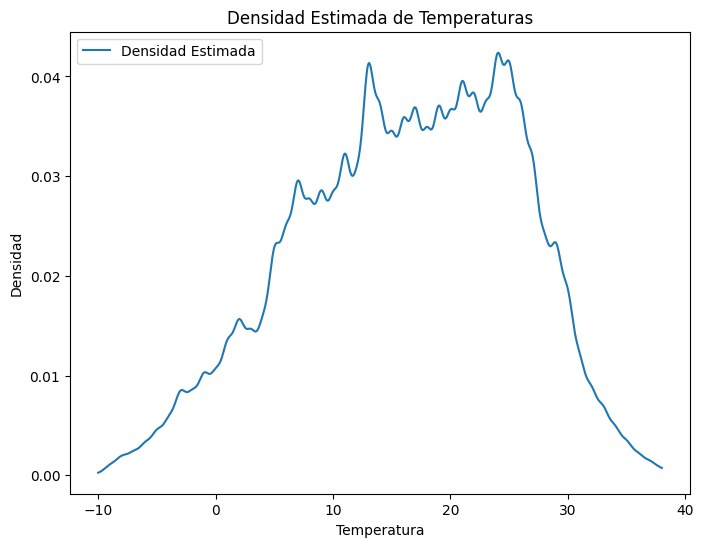

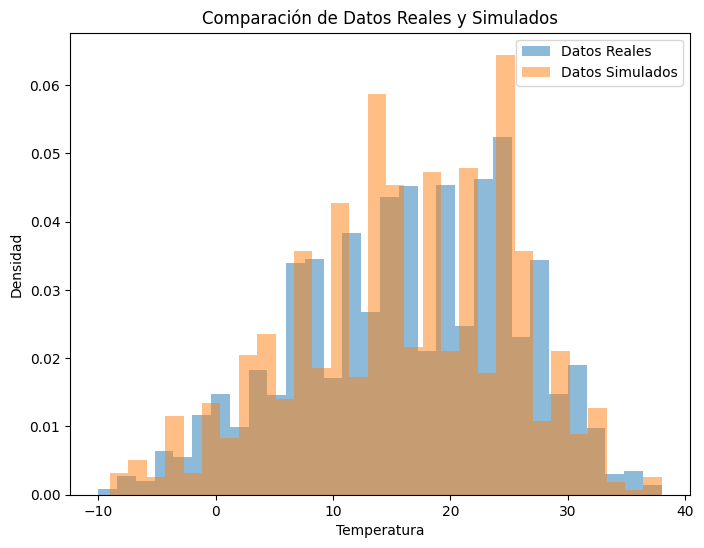

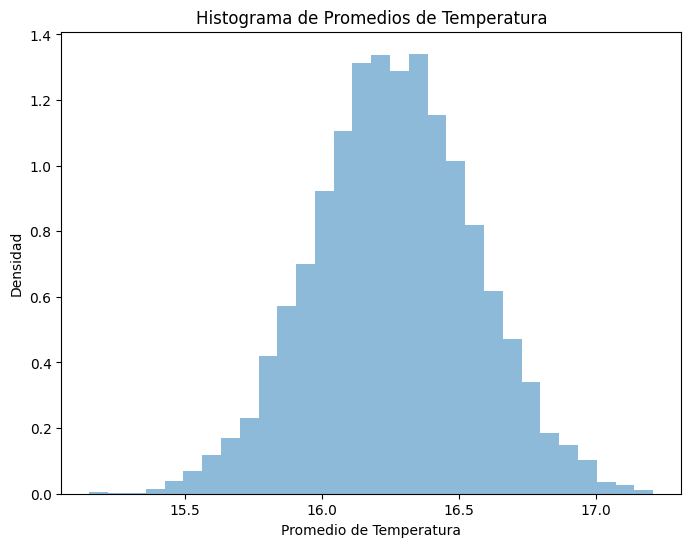

In [154]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

# Suponiendo que ya tienes df y tabla_frecuencias_df definidos

data = df['alava5'].values

# Calculo la media, mediana y moda de las temperaturas
media = df['alava5'].mean()
mediana = df['alava5'].median()
moda = stats.mode(df['alava5'])[0]

print("Media de todas las columnas:", media)
print("Moda de todas las columnas:", moda)
print("Mediana de todas las columnas:", mediana)

# Estimación de la densidad
x = np.linspace(data.min(), data.max(), 1000)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data[:, None])
log_dens = kde.score_samples(x[:, None])
densidad_estimada = np.exp(log_dens)

# Visualización de la densidad estimada
plt.figure(figsize=(8, 6))
plt.plot(x, densidad_estimada, label='Densidad Estimada')
plt.xlabel('Temperatura')
plt.ylabel('Densidad')
plt.title('Densidad Estimada de Temperaturas')
plt.legend()
plt.show()

# Simulación de 1000 datos provenientes de la distribución df['alava5']
datos_simulados = np.random.choice(data, size=1000)

# Visualización de los datos simulados y datos reales
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Datos Reales')
plt.hist(datos_simulados, bins=30, density=True, alpha=0.5, label='Datos Simulados')
plt.xlabel('Temperatura')
plt.ylabel('Densidad')
plt.title('Comparación de Datos Reales y Simulados')
plt.legend()
plt.show()

# Simulación de 10000 estimaciones del promedio de temperatura
promedios = []
for _ in range(10000):
    datos_simulados_iter = np.random.choice(data, size=1000)
    promedio_iter = np.mean(datos_simulados_iter)
    promedios.append(promedio_iter)

# Histograma de los promedios
plt.figure(figsize=(8, 6))
plt.hist(promedios, bins=30, density=True, alpha=0.5)
plt.xlabel('Promedio de Temperatura')
plt.ylabel('Densidad')
plt.title('Histograma de Promedios de Temperatura')
plt.show()
